In [1]:
import os
import zipfile
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.preprocessing import image

In [2]:
data_dir = 'Data'
data_zip = 'Data/dogs-vs-cats.zip'

TRAIN_PORTION = 0.8
BATCH_SIZE = 64

In [6]:
TRAIN_PORTION = 0.8
BATCH_SIZE = 64

In [10]:
# unzip the data file

with zipfile.ZipFile(data_zip, 'r') as zip_file:
  zip_file.extractall(data_dir)

In [3]:
# create a directory for each category to use the ImageGenerator module

train_dir = os.path.join(data_dir, 'train')
train_dogs_dir = os.path.join(train_dir, 'dogs')
train_cats_dir = os.path.join(train_dir, 'cats')

print(train_dogs_dir)
print(train_cats_dir)

Data/train/dogs
Data/train/cats


In [12]:
os.mkdir(train_dir)
os.mkdir(train_dogs_dir)
os.mkdir(train_cats_dir)

In [15]:
# unzip the train data file

train_data_zip = 'Data/train.zip'

with zipfile.ZipFile(train_data_zip, 'r') as zip_file:
  zip_file.extractall(train_dir)

In [16]:
train_data_fnames = os.listdir(os.path.join(train_dir, 'train'))

print(len(train_data_fnames)) # the total number of train images
print(train_data_fnames[:4])
print(train_data_fnames[-4:])

25000
['dog.8011.jpg', 'cat.5077.jpg', 'dog.7322.jpg', 'cat.2718.jpg']
['dog.1992.jpg', 'dog.12412.jpg', 'cat.2701.jpg', 'cat.10148.jpg']


In [17]:
# in order to use the ImageGenerator Module,
# split the train images based on their file names

train_dogs_names = [fname for fname in train_data_fnames if 'dog' in fname]
train_cats_names = [fname for fname in train_data_fnames if 'cat' in fname]

In [18]:
print(train_dogs_names[:3])
print(len(train_dogs_names)) # the number of dogs images only
print(train_cats_names[:3])
print(len(train_cats_names)) # the number of cats images only

['dog.8011.jpg', 'dog.7322.jpg', 'dog.1753.jpg']
12500
['cat.5077.jpg', 'cat.2718.jpg', 'cat.10151.jpg']
12500


In [19]:
# moving all the train images based on their categories

temp_train_dir = os.path.join(train_dir, 'train')

for dog_fname, cat_fname in zip(train_dogs_names, train_cats_names):
  shutil.move(os.path.join(temp_train_dir, dog_fname), train_dogs_dir)
  shutil.move(os.path.join(temp_train_dir, cat_fname), train_cats_dir)

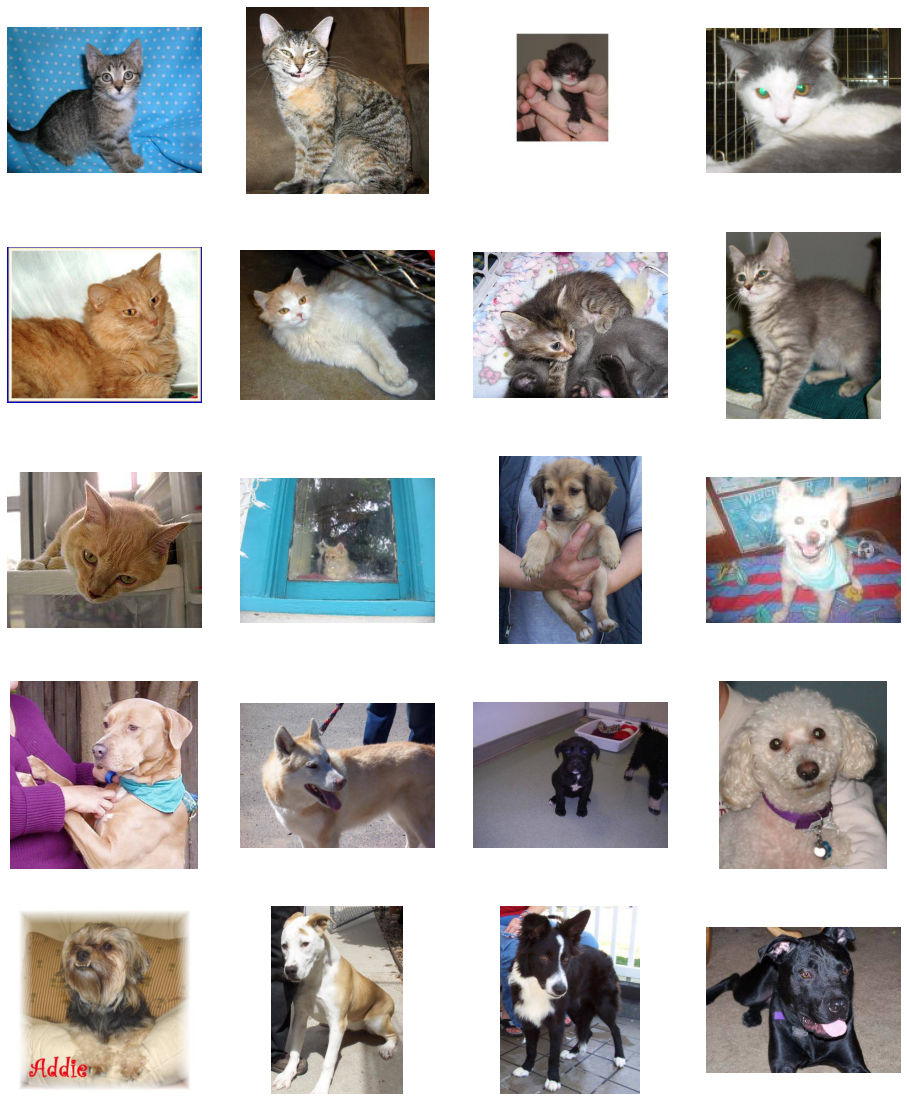

In [20]:
# pictures of first twenty examples
# first ten cats and first ten dogs

nrows = 5
ncols = 4

fig, ax = plt.subplots(ncols=ncols, nrows=nrows)
fig.set_size_inches(ncols * 4, nrows * 4)

train_cats_images = [os.path.join(train_cats_dir, fname) for fname in train_cats_names[:10]]
train_dogs_images = [os.path.join(train_dogs_dir, fname) for fname in train_dogs_names[:10]]

sample_images = train_cats_images + train_dogs_images

for i in range(nrows):
    for j in range(ncols):
        img = mpimg.imread(sample_images[i * ncols + j])
        ax[i, j].axis('Off')
        ax[i, j].imshow(img)

plt.show()

In [22]:
# glance at the shape of single train example

temp_image = mpimg.imread(sample_images[0])
print(temp_image.shape)

(300, 399, 3)


In [4]:
# Model Building

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=[150, 150, 3]),
    MaxPool2D(2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D(2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')  # 1 neuron because it's a binary classification
])

print((model.summary()))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [5]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
# splitting train and validation size

train_dogs_names = os.listdir(train_dogs_dir)
train_cats_names = os.listdir(train_cats_dir)

train_dogs_size = int(len(train_dogs_names) * TRAIN_PORTION)
print(train_dogs_size)
train_cats_size = int(len(train_cats_names) * TRAIN_PORTION)
print(train_cats_size)

# shuffling train examples
random.shuffle(train_dogs_names)
random.shuffle(train_cats_names)

# creating validation samples and updating train samples
validation_dogs_name = train_dogs_names[train_dogs_size:]
validation_cats_name = train_cats_names[train_cats_size:]
train_dogs_names = train_dogs_names[:train_dogs_size]
train_cats_names = train_cats_names[:train_cats_size]
print(len(validation_cats_name), len(validation_dogs_name), len(train_cats_names), len(train_dogs_names), sep='\t')

10000
10000
2500	2500	10000	10000


In [6]:
# creating directory that will hold validation images for each category

validation_dir = os.path.join('Data', 'validation')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')

In [27]:
os.mkdir(validation_dir)
os.mkdir(validation_dogs_dir)
os.mkdir(validation_cats_dir)

In [28]:
# moving validation examples to validation directory

for validation_cat_name in validation_cats_name:
    shutil.move(os.path.join(train_cats_dir, validation_cat_name), validation_cats_dir)

for validation_dog_name in validation_dogs_name:
    shutil.move(os.path.join(train_dogs_dir, validation_dog_name), validation_dogs_dir)

In [8]:
# creating a ImageDataGenerator object to import all the images

test_datagen = image.ImageDataGenerator(rescale=1.0/255.0,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

validation_datagen = image.ImageDataGenerator(rescale=1.0/255.0)

# added the rescale argument to normalize our input data
# also, I decided to augment the images in order to avoid
# any possible overfitting issues by adding noise to train
# examples.

# creating train/validation generators
train_generator = test_datagen.flow_from_directory(train_dir,
                                              target_size=[150, 150],
                                              batch_size=BATCH_SIZE,
                                              class_mode='binary',
                                              classes=['cats', 'dogs']) # in order to exclude the any possible extra classes

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                   target_size=[150, 150],
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [9]:
# train the model

history = model.fit(train_generator,
                    epochs=20,
                    validation_data=validation_generator)

Epoch 1/20
313/313 [==============================] - 429s 1s/step - loss: 0.6628 - accuracy: 0.6067 - val_loss: 0.5973 - val_accuracy: 0.6892

In [10]:
# plots that show how the model is doing over 10 epochs

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

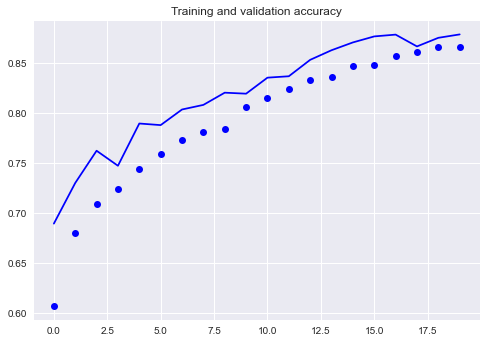

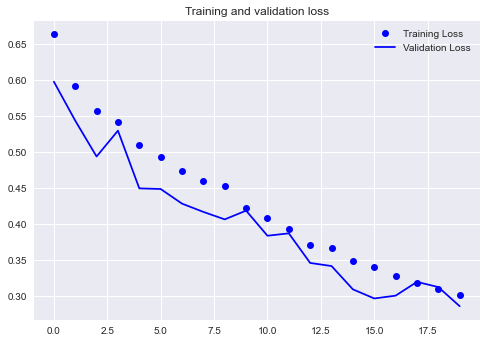

In [11]:
plt.style.use('seaborn')

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()